## Problem 1

Explain what makes HIV unique. What are the consequences of this? What is AIDS?

Viruses inject their genes into living cells, force the cells to replicate their genes, and then lyse them (tear them apart. The immune system has a T cells that recognize invaders and destroy previous infected cells. HIVis unique because it targets these T cells. The consequence is that this causes Acquired Immune Deficiency Syndrome (AIDS). AIDS is not an infection, it comes from the lack of T cells, and makes the body more susceptible to common infections.

## Problem 2

How is AIDS treated and what are the considerations for treatment?

AIDS has no vaccine or cure, but it is treated by trying to strengthen the immune system by increasing the number of T cells there are in the body. However, since this is expensive or have negative side effects, other considerations include trying to optimize the amount of drugs use.

## Problem 3

In [71]:
# Dependencies for this lab✬s code:
import numpy as np
from matplotlib import pyplot as plt
from __future__ import division
%matplotlib inline

#Code from RK4 Lab with minor edits
def initialize_all(y0, t0, t, n):
    """ An initialization routine for the different ODE solving
    methods in the lab. This initializes Y, T, and h. """
    if isinstance(y0, np.ndarray):
        Y = np.empty((n, y0.size)).squeeze()
    else:
        Y = np.empty(n)
    Y[0] = y0
    T = np.linspace(t0, t, n)
    h = float(t - t0) / (n - 1)
    return Y, T, h

def RK4(f, y0, t0, t, n):
    """ Use the RK4 method to compute an approximate solution
    to the ODE y✬ = f(t, y) at n equispaced parameter values from t0 to t
    with initial conditions y(t0) = y0.
    y0 is assumed to be either a constant or a one-dimensional numpy array.
    t and t0 are assumed to be constants.
    f is assumed to accept three arguments.
    The first is a constant giving the value of t.
    The second is a one-dimensional numpy array of the same size as y.
    The third is an index to the other arrays.
    This function returns an array Y of shape (n,) if
    y is a constant or an array of size 1.
    It returns an array of shape (n, y.size) otherwise.
    In either case, Y[i] is the approximate value of y at
    the i✬th value of np.linspace(t0, t, n).
    """
    Y,T,h = initialize_all(y0,t0,t,n)
    for i in xrange(n-1):
        K1 = f(T[i],Y[i],i)
        K2 = f(T[i]+h/2.,Y[i]+h/2.*K1,i)
        K3 = f(T[i]+h/2.,Y[i]+h/2.*K2,i)
        K4 = f(T[i+1],Y[i]+h*K3,i)
        Y[i+1] = Y[i] + h/6.*(K1+2*K2 +2*K3+K4)
    return Y

In [72]:
a_1, a_2 = 0, 0
b_1, b_2 = 0.02, 0.9
s_1, s_2 = 2., 1.5
mu = 0.002
k = 0.000025
g = 30.
c = 0.007
B_1, B_2 = 14, 1
A_1, A_2 = 250000, 75
T0, V0 = 400, 3
t_f = 50
n = 1000


In [73]:
# initialize global variables, state, costate, and u.
state = np.zeros((n,2))
state0 = np.array([T0, V0])

costate = np.zeros((n,2))
costate0 = np.zeros(2)

u=np.zeros((n,2))
u[:,0] += .02
u[:,1] += .9

# define state equations
def state_equations(t,y,i):
    '''
    Parameters
    ---------------
    t : float
    the time
    y : ndarray (2,)
    the T cell concentration and the Virus concentration at time t
    i : int
    index for the global variable u.
    Returns
    --------------
    y_dot : ndarray (2,)
    the derivative of the T cell concentration and the virus ←-
    concentration at time t
    '''
    #y[1] = V, y[0] = T, lam1 = costate[i, 0], lam2 = costate[i, 1]
    t_dot = s_1 - (s_1*y[1])/(B_1 + y[1]) - mu*y[0] - k*y[1]*y[0] + np.minimum(np.maximum(a_1, costate[i, 0]*y[0]*-1/(2*A_1)), b_1) * y[0]
    v_dot = ((g*(1 - np.minimum(np.maximum(a_2, (costate[i, 1]/(2*A_2) ) * (g*y[1])/(B_2 + y[1]) ), b_2))*y[1]) / (B_2 + y[1])) - c*y[1]*y[0]
    return np.array([t_dot, v_dot])

## Problem 4

In [74]:
def lambda_hat(t,y,i):
    '''
    Parameters
    ---------------
    t : float
    the time
    y : ndarray (2,)
    the lambda_hat values at time t
    i : int
    index for global variables, u and state.
    Returns
    --------------
    y_dot : ndarray (2,)
    the derivative of the lambda_hats at time t.
    '''
    #y[0] = lam1, y[1] = lam2, V = state[i, 1], T = state[i, 0]
    #u1 = u[i, 0], u2 = u[i, 1] 
    lam_dot1 = y[0]*(-mu - k*state[-i, 1] + u[-i, 0]) - c*y[1]*state[-i, 1] - 1
    lam_dot2 = -y[0]*( ( (s_2*B_1)/(B_1 + state[-i, 1] )**2) + k*state[-i, 0] ) + y[1]*( ( (g*B_2*(1-u[-i, 1] ) )/(B_2 + state[-i, 1] )**2 ) - c*state[-i, 0] )
    return np.array([lam_dot1, lam_dot2])

## Problem 5

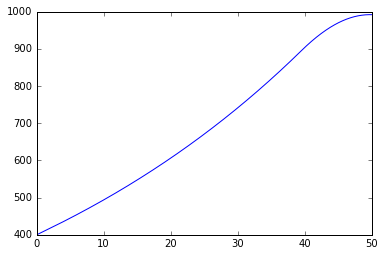

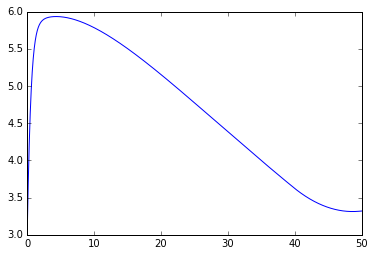

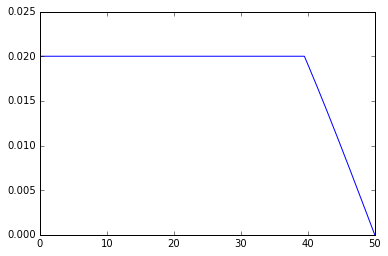

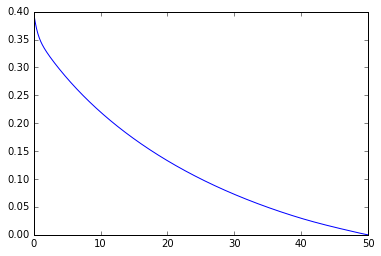

In [75]:
epsilon = 0.001
test = epsilon + 1

while(test > epsilon):
    oldu = u.copy();
    
    #solve the state equations with forward iteration
    #state = RK4(...)
    state = RK4(state_equations, state0, 0, t_f, n)
    
    #solve the costate equations with backwards iteration
    #costate = RK4(...)[::-1]
    costate = RK4(lambda_hat, costate0, 0, t_f, n)[::-1]
    
    
    #solve for u1 and u2
    u1 = np.minimum(np.maximum(a_1, ( (-1)/(2*A_1) )* costate[:, 0]*state[:, 0] ), b_1)
    u2 = np.minimum(np.maximum(a_2, ((g*state[:, 1])/(B_2 + state[:, 1]))*(costate[:, 1]/(2*A_2))), b_2)
    
    #update control
    u[:,0] = 0.5*(u1 + oldu[:,0])
    u[:,1] = 0.5*(u2 + oldu[:,1])
    
    #test for convergence
    test = abs(oldu - u).sum()

plt.plot(np.linspace(0, t_f, n), state[:, 0])
plt.show()
plt.plot(np.linspace(0, t_f, n), state[:, 1])
plt.show()
plt.plot(np.linspace(0, t_f, n), u[:, 0])
plt.show()
plt.plot(np.linspace(0, t_f, n), u[:, 1])
plt.show()